## Data visualization on Exchange rates

1. The aim of this project is to clean and visualize the Euro to USD exchange rates during the Corona Pandemic
2. Daily exchange rates per Euro between 1999 till 2021 from a dataset in [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020)

In [1]:
import pandas as pd

exchange_rate = pd.read_csv('../my_datasets/euro-daily-hist_1999_2020.csv')
exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [2]:
exchange_rate.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


### Initial outlook

- 40 columns each shows a currency rate to Euro on a certain date between 4th of January 1999 till 8th of January 2021 (5699 rows).
- Most columns have `object` data type and 17 columns have null values. 

### Cleaning 

In [3]:
# Renaming Period\Unit and [US dollar], changing Time dtype and sorting by Time
# and resting the index

exchange_rate.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rate['Time'] = pd.to_datetime(exchange_rate['Time'])
exchange_rate.sort_values('Time', inplace=True)
exchange_rate.reset_index(drop=True, inplace=True)

In [4]:
# Isolated the Time and US_dollar
euro_to_dollar = exchange_rate[['Time', 'US_dollar']]
print(euro_to_dollar['US_dollar'].value_counts())

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64


In [5]:
# Dropped rows with '-' 
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
print(euro_to_dollar['US_dollar'].value_counts())

1.2276    9
1.1215    8
1.1305    7
1.3373    6
1.3532    6
         ..
1.2571    1
1.2610    1
1.2651    1
1.2632    1
1.2193    1
Name: US_dollar, Length: 3527, dtype: int64


In [6]:
# Changing data type from Object to float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


### Visualization of the Euro to USD exchage rate

- The first visual illustrate the original values between 1999 till 2021

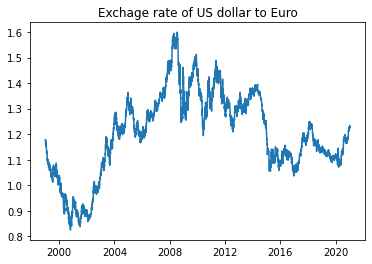

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'], 
         euro_to_dollar['US_dollar'])
plt.title('Exchage rate of US dollar to Euro')
plt.show()

- Below, with a moving window of 30 days the rolling mean of exchange rate in the same time frame looks smoother.

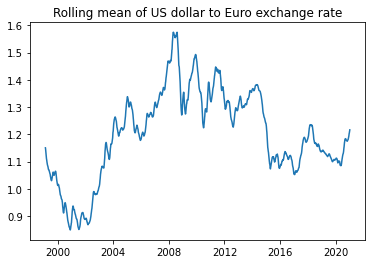

In [8]:
rolling_mean = euro_to_dollar['US_dollar'].rolling(30).mean()
plt.plot(euro_to_dollar['Time'], 
         rolling_mean)
plt.title('Rolling mean of US dollar to Euro exchange rate')
plt.show()

### exchange rate during Corona Pandemic during 2020

- First splitting the data from Jan 2016 to Dec 2020

In [25]:
pandemic_rate = euro_to_dollar[(euro_to_dollar['Time'] >= pd.Timestamp(2016,1,1)) & 
                               (euro_to_dollar['Time'] <= pd.Timestamp(2020,12,30))]

pandemic_base = pandemic_rate[pandemic_rate['Time'] >= pd.Timestamp(2017,12,30)]

# rolling_mean1 = pandemic_rate['US_dollar'].rolling(30).mean()
# rolling_mean2 = pandemic_base['US_dollar'].rolling(30).mean()

pandemic_rate

,Time,US_dollar
4415,2016-01-04,1.0898
4416,2016-01-05,1.0746
4417,2016-01-06,1.0742
4418,2016-01-07,1.0868
4419,2016-01-08,1.0861
...,...,...
5688,2020-12-23,1.2166
5689,2020-12-24,1.2193
5690,2020-12-28,1.2219
5691,2020-12-29,1.2259


[16436. 16801. 17167. 17532. 17897. 18262. 18628.] [1.   1.05 1.1  1.15 1.2  1.25 1.3 ]


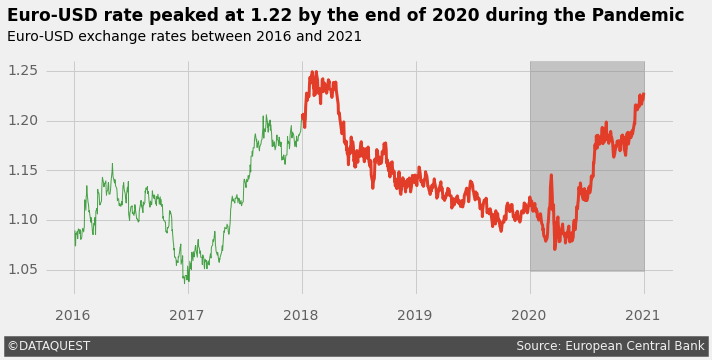

In [28]:
### Adding the FiveThirtyEight style
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')

### Adding the plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(pandemic_rate['Time'], 
        pandemic_rate['US_dollar'], 
        color='green', alpha=0.7, linewidth=1)

### Highlighting the 2018-2020 period
ax.plot(pandemic_base['Time'], 
        pandemic_base['US_dollar'], 
        color='#e23d28', linewidth=3)

## Graph customize
a_list = ['top','bottom','left','right']
for spine in a_list:
    ax.spines[spine].set_visible(False)

## Instead of pd.Timestamp for x coordinates you can use ** ax.get_xticks()** and **ax.get_yticks()**   

### Highlighting 2020 pandemic period
plt.axvspan(pd.Timestamp(2020,1,1), 
            pd.Timestamp(2021,1,1), 
            ymin=0.1, color='gray', alpha=0.4)

### Adding separate tick labels 
ax.set_xticklabels([])
ax.set_yticklabels([])
# X
year = 2020
for loop in range(6):
    ax.text(x=pd.Timestamp(year,11,1), y=1, 
            s=str(year +1), alpha=0.6)
    year -= 1

# Y 
h = 1.046
rates = ['1.05', '1.10', '1.15', '1.20', '1.25']
for rate in rates:
    ax.text(x=pd.Timestamp(2015,6,1), y=h, 
            s= rate, alpha=0.6)
    h += 0.05
    
### Title, subtitle and data source
ax.text(pd.Timestamp(2015,6,1), 1.3,
        'Euro-USD rate peaked at 1.22 by the end of 2020 during the Pandemic',
        size=17, weight='bold')
ax.text(pd.Timestamp(2015,6,1), 1.28,
        'Euro-USD exchange rates between 2016 and 2021')

### Adding a signature
ax.text(pd.Timestamp(2015,6,1), 0.97, '©DATAQUEST' + ' '*110 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
       size=12)

plt.show()